#### eBayAuctions.csv shows transactions of recent auctions on eBay.com. The goal is to use these data to build a model that classifies auctions as competitive or noncompetitive. A competitive auction is defined as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive.

#### a. Convert variable duration into a categorical variable. Split the data into training (60%) and validation (40%) datasets.

#### b. Fit a classification tree. To avoid overfitting, set the minimum number of records in a terminal node to 50 and the maximum tree depth to 7. What is the classification of an auction with 3 dollars open price and 12 dollars closed price?

#### c. Examine the lift chart and the confusion matrix for the tree. What can you say about the predictive performance of this model?

#### d. Fit a kNN with normalized inputs. What value of k seems to work best? 

#### e. Show an ROC curve to compare the results of classification tree and kNN. Which method is more accurate?


In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import preprocessing
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import statsmodels.formula.api as sm

import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score #, BIC_score


In [4]:
df = pd.read_csv('Datasets/eBayAuctions.csv')

In [5]:
print(df.columns)

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')


In [6]:
print(df.head())

           Category currency  sellerRating  Duration endDay  ClosePrice   
0  Music/Movie/Game       US          3249         5    Mon        0.01  \
1  Music/Movie/Game       US          3249         5    Mon        0.01   
2  Music/Movie/Game       US          3249         5    Mon        0.01   
3  Music/Movie/Game       US          3249         5    Mon        0.01   
4  Music/Movie/Game       US          3249         5    Mon        0.01   

   OpenPrice  Competitive?  
0       0.01             0  
1       0.01             0  
2       0.01             0  
3       0.01             0  
4       0.01             0  


In [7]:
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [8]:
# Convert variable duration into a categorical variable
df['Duration'] = df['Duration'].astype('category')

In [9]:
# Split the data into training (60%) and validation (40%) datasets
train_df, valid_df = train_test_split(df, test_size=0.4, random_state=1)

In [10]:
# Fit a classification tree
predictors = ['ClosePrice', 'OpenPrice']
outcome = 'Competitive?'
tree_model = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=1)
tree_model.fit(train_df[predictors], train_df[outcome])

DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=1)

In [12]:
# Confusion Matrix
classificationSummary(train_df[outcome], tree_model.predict(train_df[predictors]))
classificationSummary(valid_df[outcome], tree_model.predict(valid_df[predictors]))

Confusion Matrix (Accuracy 0.8318)

       Prediction
Actual   0   1
     0 485  68
     1 131 499
Confusion Matrix (Accuracy 0.8048)

       Prediction
Actual   0   1
     0 313  40
     1 114 322


In [13]:
# Normalize data
scaler = StandardScaler()
scaler.fit(train_df[predictors])
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]

In [14]:
# Train a classifier for different values of k
results = []
for k in range(1, 31, 1):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'training_accuracy': accuracy_score(train_y, knn.predict(train_X)),
        'validation_accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,training_accuracy,validation_accuracy
0,1,0.947591,0.898606
1,2,0.952663,0.913815
2,3,0.950127,0.917617
3,4,0.924768,0.894804
4,5,0.929839,0.899873
5,6,0.921386,0.896071
6,7,0.916314,0.896071
7,8,0.901944,0.893536
8,9,0.898563,0.893536
9,10,0.881657,0.885932


In [15]:
tree_probs = tree_model.predict_proba(valid_df[predictors])[:, 1]
knn_probs = knn.predict_proba(valid_X)[:, 1]

In [16]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
fpr_tree, tpr_tree, _ = roc_curve(valid_df[outcome], tree_probs)
fpr_knn, tpr_knn, _ = roc_curve(valid_df[outcome], knn_probs)
roc_auc_tree = auc(fpr_tree, tpr_tree)
roc_auc_knn = auc(fpr_knn, tpr_knn)

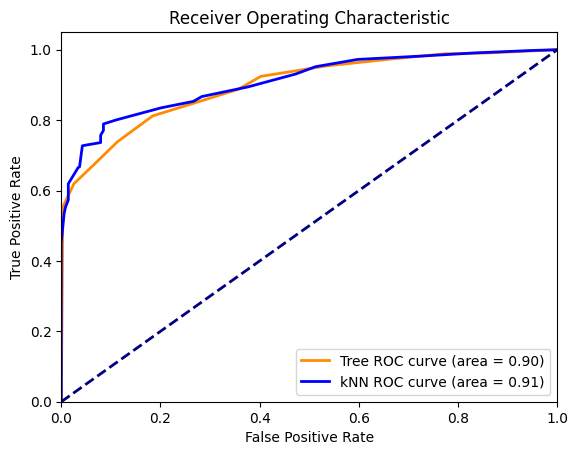

In [17]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=lw, label=f'Tree ROC curve (area = {roc_auc_tree:.2f})')
plt.plot(fpr_knn, tpr_knn, color='blue', lw=lw, label=f'kNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
# KNN Model with has higher AUC value therefore is more accurate.